<a href="https://colab.research.google.com/github/SuganyaMurugesan/TrafficLightDetection/blob/master/ModelInspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/HCLHackathon')

In [0]:
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2975 sha256=3810ef75b7f69260dd8cea028eeae60aed24dcd2695645b5d635ed716b37afc3
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
import cv2

from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
from mrcnn.config import Config
import tensorflow as tf

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import import_ipynb
import SmallObject as SmallObject
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

%matplotlib inline

Using TensorFlow backend.


importing Jupyter notebook from SmallObject.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
config = SmallObject.TrafficLightConfig()
TRAFFICLIGHT_DIR = "/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train"

In [0]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
AUGMENT                        True
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MASK_THRESHOLD       0.35
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0.75
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_m

In [0]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [0]:
train_list, val_list = SmallObject.train_validation_split(
        "/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train", seed=11, test_size=0.1)
dataset = SmallObject.TrafficLightDataset()
dataset.load_trafficlight(val_list, "/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train")
dataset.prepare()

Index(['718570.png', '682572.pgm', '711724.pgm', '620348.pgm', '689492.pgm',
       '59526.pgm', '57058.pgm', '624974.png', '687614.png', '719752.png',
       '720376.pgm', '614914.pgm', '681876.png', '718154.png', '65772.pgm',
       '57196.pgm', '627086.png', '718710.pgm', '625322.png', '687336.pgm',
       '717598.png', '614566.pgm', '514586.png', '690116.pgm', '622462.pgm',
       '60082.png', '626392.pgm', '683684.pgm', '681876.pgm', '717528.png',
       '614566.png', '689562.png', '682920.pgm', '60290.pgm', '718710.png',
       '682502.png', '720724.png', '620418.pgm', '713392.png', '60360.pgm',
       '689840.png', '625044.pgm', '688032.png'],
      dtype='object', name='filename')


In [0]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=DEFAULT_LOGS_DIR,
                              config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [0]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
weights_path = "/content/drive/My Drive/Colab Notebooks/HCLHackathon/logs/trafficlight20191128T1144/mask_rcnn_trafficlight_0075.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/drive/My Drive/Colab Notebooks/HCLHackathon/logs/trafficlight20191128T1144/mask_rcnn_trafficlight_0075.h5






Re-starting from epoch 75


IN IMAGE REFERENCE ***************$$$$$$$$
image ID: trafficlight.687336.pgm (19) /content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/687336.pgm
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max: 3839.00000  int32
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max: 3735.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32
gt_class_id              shape: (0,)                  min:             max:             int32
gt_bbox                  shape: (0, 4)                min:             max:             int32
gt_mask                  shape: (512, 512, 0)         min:             max:             bool


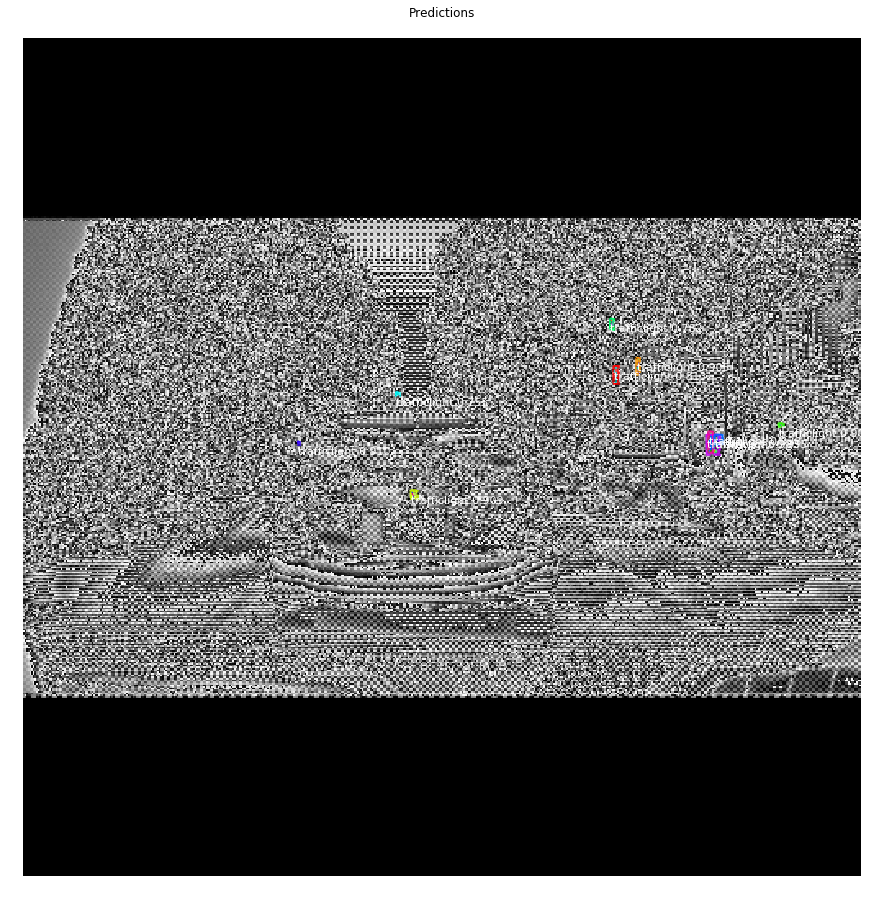

In [0]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)

r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [0]:
def compute_batch_ap(image_ids):
    APs = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id,gt_mask,
                              r['rois'], r['class_ids'], r['scores'],r['masks'])
        APs.append(AP)
    return APs

# Pick a set of random images
image_ids = np.random.choice(dataset.image_ids, 10)
APs = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))